In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_17623/4272067897.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [27]:
unregistered = pd.read_csv('/fs5/p_masi/rudravg/MxIF_Vxm_Registered/GCA033TIB_TISSUE01/unregistered_GCA033TIB_instances.csv')
registered = pd.read_csv('/fs5/p_masi/rudravg/MxIF_Vxm_Registered/GCA033TIB_TISSUE01/registered_GCA033TIB_instances.csv')

In [17]:
unregistered.head()

,Instance,Centroid_X,Centroid_Y,Mean_CD11B,Mean_CD20,Mean_CD3d,Mean_CD45,Mean_CD4,Mean_CD68,Mean_CD8,Mean_CgA,Mean_Lysozyme,Mean_NaKATPase,Mean_PanCK,Mean_SMA,Mean_Sox9,Mean_Vimentin,Mean_OLFM4,slide_id
0,24,9278.628521,463.320423,4.151408,0.000000,0.132042,0.001761,0.012324,0.005282,0.049296,0.000000,4.151408,12.176056,4.151408,0.000000,0.417254,4.151408,0.0,1.0
1,25,9428.094877,465.772296,3.235294,0.100569,0.000000,0.000000,1.929791,0.500949,0.091082,2.622391,3.235294,6.829222,3.235294,0.070209,10.502846,3.235294,0.0,NaN
2,10,8884.857143,448.880000,5.205714,0.000000,0.000000,7.371429,2.074286,89.662857,0.022857,0.125714,5.205714,0.000000,5.205714,0.154286,6.485714,5.205714,0.0,NaN
3,3,8914.823633,435.280423,2.671958,0.000000,0.000000,1.317460,0.112875,41.347443,0.000000,0.005291,2.671958,0.000000,2.671958,0.000000,13.537919,2.671958,0.0,NaN
4,32,9211.404066,476.768742,3.936468,0.000000,0.359593,0.000000,0.001271,0.000000,0.000000,0.175349,3.936468,16.191868,3.936468,0.000000,0.000000,3.936468,0.0,NaN


In [18]:
# Save the modified dataframes as CSV files
unregistered.to_csv('/fs5/p_masi/rudravg/MxIF_Vxm_Registered/GCA020TIB_TISSUE01/unregistered_GCA012TIB_instances_modified_flip_test.csv', index=False)
registered.to_csv('/fs5/p_masi/rudravg/MxIF_Vxm_Registered/GCA020TIB_TISSUE01/registered_GCA012TIB_instances_v2_modified_flip_test.csv', index=False)

In [39]:
n = len(unregistered.columns[3:])
import seaborn as sns
# Calculate the number of rows and columns for the subplots
ncols = 3  # Number of columns in the subplot grid
nrows = int(np.ceil(n / ncols))  # Number of rows in the subplot grid

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Flatten the axes array
axes = axes.ravel()

# Create a Bland-Altman plot for each column
for i, column in enumerate(unregistered.columns[3:]):
    mean = (unregistered[column] + registered[column]) / 2
    diff =(unregistered[column] - registered[column]) 
    sd_diff = 1.96*(np.std(diff, axis=0))
    cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
    sns.kdeplot(x=mean, y=diff, cmap=cmap, fill=True, bw_method=0.3, ax=axes[i])

    axes[i].axhline(y=np.mean(diff), color='r', linestyle='--')
    axes[i].axhline(y=np.mean(diff) + sd_diff, color='b', linestyle='--')  # +1 sigma line
    axes[i].axhline(y=np.mean(diff) - sd_diff, color='b', linestyle='--')  # -1 sigma line
    axes[i].set_title(column)
    axes[i].set_xlabel('Mean of measurements')
    axes[i].set_ylabel('(unregistered - registered)')

# Remove the extra subplots
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

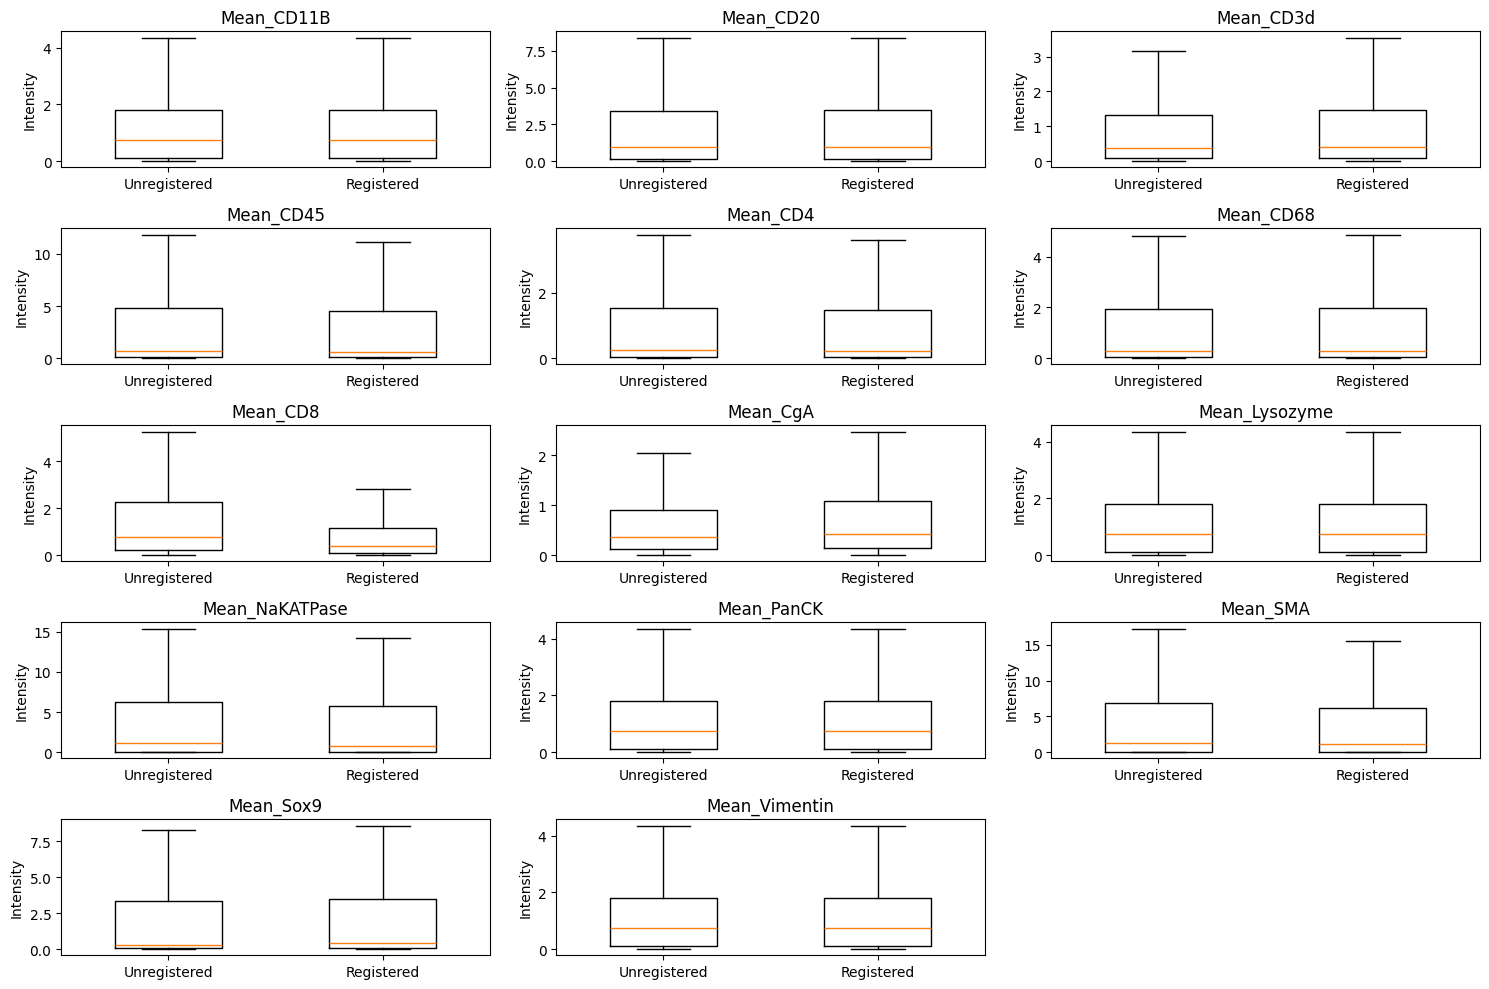

In [32]:
import matplotlib.pyplot as plt
import numpy as np

n = len(unregistered.columns[3:-1])

# Calculate the number of rows and columns for the subplots
ncols = 3  # Number of columns in the subplot grid
nrows = int(np.ceil(n / ncols))  # Number of rows in the subplot grid

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Flatten the axes array
axes = axes.ravel()

# Create a box plot for each column
for i, column in enumerate(unregistered.columns[3:-1]):
    data = [unregistered[column], registered[column]]
    axes[i].boxplot(data, widths=0.5, sym='')  # sym='' removes outliers
    axes[i].set_title(column)
    axes[i].set_ylabel('Intensity')
    axes[i].set_xticklabels(['Unregistered', 'Registered'])

# Remove the extra subplots
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

/home/local/VANDERBILT/rudravg/miniconda3/envs/dapi_reg/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/local/VANDERBILT/rudravg/miniconda3/envs/dapi_reg/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/local/VANDERBILT/rudravg/miniconda3/envs/dapi_reg/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/local/VANDERBILT/rudravg/miniconda3/envs/dapi_reg/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/local/VANDERBILT/rudravg/miniconda3/envs/dapi_reg/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: i

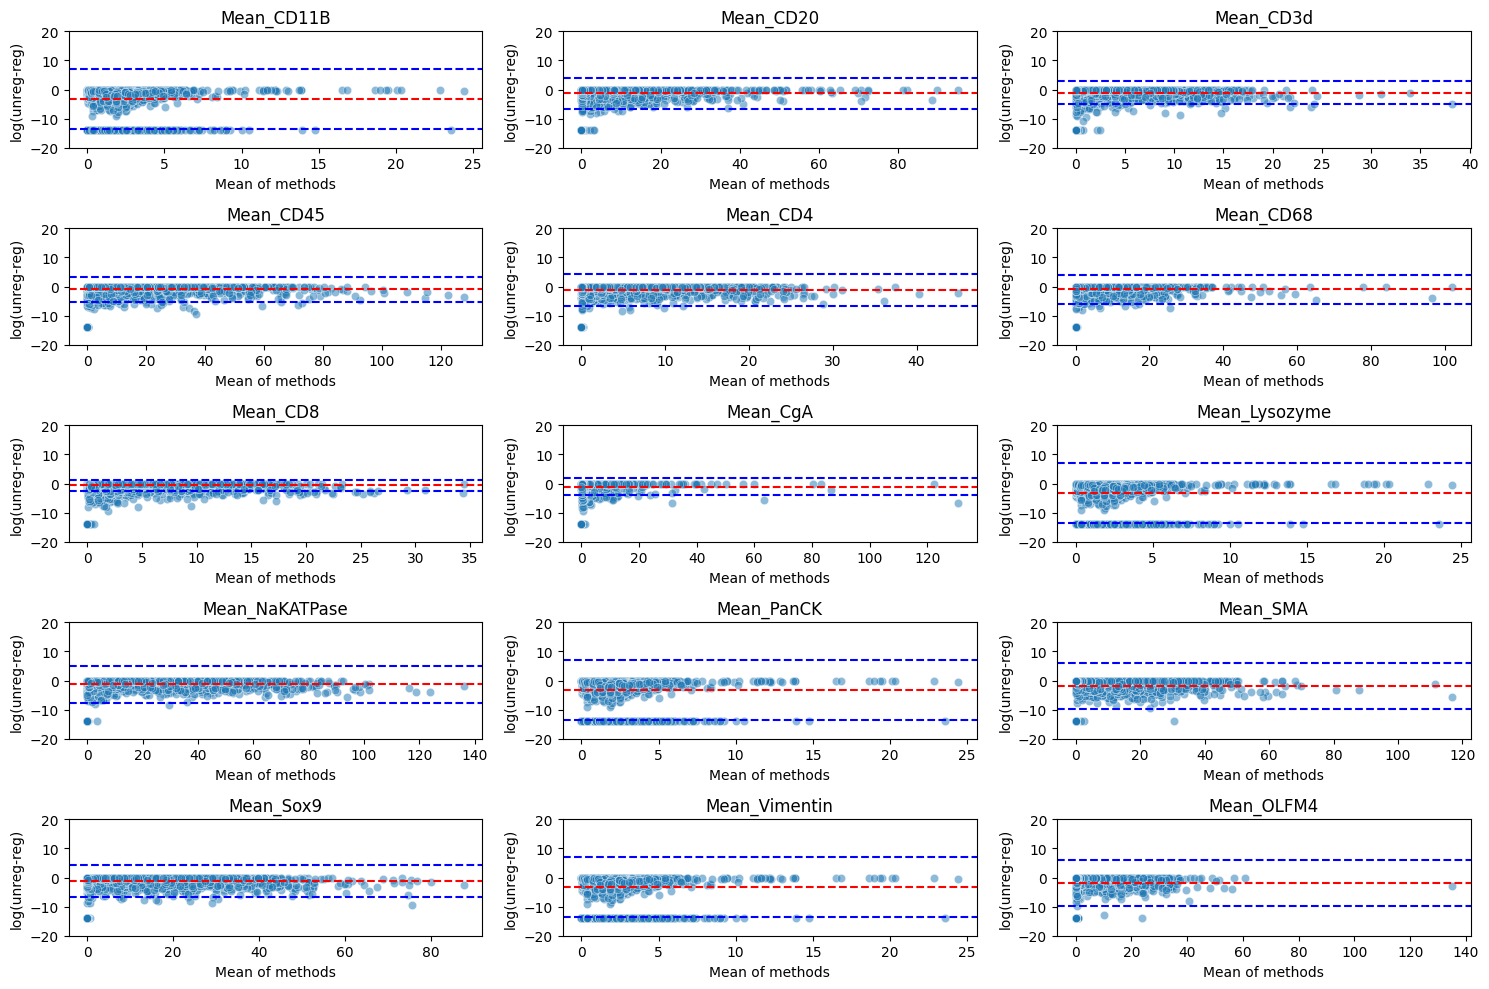

In [33]:
import seaborn as sns
# Calculate the number of rows and columns for the subplots
n = len(unregistered.columns[3:])

ncols = 3  # Number of columns in the subplot 
nrows = int(np.ceil(n / ncols))  # Number of rows in the subplot grid

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

axes = axes.ravel()

for i, column in enumerate(unregistered.columns[3:]):
    mean = (unregistered[column] + registered[column]) / 2
    diff_ratio = (unregistered[column] - registered[column]) / (unregistered[column] + registered[column]+1e-6)
    diff_ratio = diff_ratio.replace([np.inf, -np.inf], np.nan)
    diff_ratio.dropna(inplace=True)
    log_diff_ratio = np.log(diff_ratio+1e-6)
    sd_diff = 1.96*np.std(log_diff_ratio, axis=0)
    sns.scatterplot(x=mean, y=log_diff_ratio, ax=axes[i], alpha=0.5)
    axes[i].axhline(y=np.mean(log_diff_ratio), color='r', linestyle='--')
    axes[i].axhline(y=np.mean(log_diff_ratio) + sd_diff, color='b', linestyle='--')  # +1 sigma line
    axes[i].axhline(y=np.mean(log_diff_ratio) - sd_diff, color='b', linestyle='--')  # -1 sigma line
    axes[i].set_title(column)
    axes[i].set_xlabel('Mean of methods')
    axes[i].set_ylabel('log(unreg-reg)')
    axes[i].set_ylim(-20, 20)

# Remove the extra subplots
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()